# Analysis and visualisation of results

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import helpers as h

In [2]:
data_path = "../results/valid_tests_1"
encryption_methods = ["ASCON", "masked_ASCON", "AES-GCM", "NONE"]
metrics = ["RTT", "S_PROC", "R_PROC", "DS_PROC", "DS_ENC", "DS_DEC","GW_US_PROC", "GW_DS_PROC", "ENC", "DEC"]
scenarios = 12


paths = {}
for encryption_method in encryption_methods:
    if encryption_method not in paths:
        paths[encryption_method] = []
    for i in range(1,scenarios+1):
        path = os.path.join(data_path, encryption_method, f"{encryption_method}_scen{i}")
        paths[encryption_method].append(path)

In [3]:
frames = {}

for encryption_method in encryption_methods:
    if encryption_method not in frames:
        frames[encryption_method] = []
    for i in range(0,scenarios):
        frames[encryption_method].append(h.load_and_merge_logs(paths[encryption_method][i]))

No files found in ../results/valid_tests_1/masked_ASCON/masked_ASCON_scen8.
Removed 1 rows with NaN values from ../results/valid_tests_1/AES-GCM/AES-GCM_scen11.
Removed 1 rows with zero values from ../results/valid_tests_1/AES-GCM/AES-GCM_scen11.
Removed 1 rows where Start_Time > End_Time from ../results/valid_tests_1/AES-GCM/AES-GCM_scen11.
Removed 1 rows where Start_Time > End_Time from ../results/valid_tests_1/AES-GCM/AES-GCM_scen12.


In [4]:
h.add_hw_and_networking_time(frames)
h.add_encyprion_time_of_RTT(frames)

'NoneType' object is not subscriptable
'RTT_Delta'
'DS_ENC_Delta'
'DS_ENC_Delta'
'DS_ENC_Delta'
'DS_ENC_Delta'
'DS_ENC_Delta'
'DS_ENC_Delta'
'DS_ENC_Delta'
'DS_ENC_Delta'
'DS_ENC_Delta'
'DS_ENC_Delta'
'DS_ENC_Delta'
'DS_ENC_Delta'


In [5]:
frames["masked_ASCON"][1]

,NTNU_network_time_Delta,BLE_transmission_time_Delta,RTT_Delta,S_PROC_Delta,R_PROC_Delta,DS_PROC_Delta,DS_ENC_Delta,DS_DEC_Delta,GW_US_PROC_Delta,GW_DS_PROC_Delta,ENC_Delta,DEC_Delta,HW_and_Network_Delta,percent_of_RTT_Delta,DS_crypto_time_Delta,DS_encryption_time_of_RTT_Delta,S_crypto_time_Delta,S_encryption_time_of_RTT_Delta
0,148.261527,33.582,194.121,3.634,2.624,1.466473,0.211500,0.260964,3.091,1.462,2.497,2.347,181.843527,93.675350,0.472464,0.243386,4.844,2.495351
1,253.348255,122.469,386.223,3.369,2.554,1.345745,0.184048,0.244923,1.679,1.458,2.219,2.305,375.817255,97.305768,0.428971,0.111068,4.524,1.171344
2,105.273958,88.979,205.863,3.478,2.615,1.643042,0.200458,0.250944,2.415,1.459,2.293,2.352,194.252958,94.360307,0.451402,0.219273,4.645,2.256355
3,51.864274,65.024,127.128,3.484,2.577,1.046726,0.211800,0.201420,1.670,1.462,2.282,2.313,116.888274,91.945342,0.413220,0.325042,4.595,3.614467
4,360.976993,74.476,445.795,3.507,2.586,1.116007,0.181593,0.206290,1.670,1.463,2.299,2.325,435.452993,97.680098,0.387883,0.087009,4.624,1.037248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,151.252633,61.674,223.498,3.486,2.579,1.368367,0.232821,0.382864,1.673,1.465,2.296,2.314,212.926633,95.270040,0.615685,0.275477,4.610,2.062658
96,101.544312,30.864,143.459,3.477,2.586,1.458688,0.187064,0.299626,2.066,1.463,2.282,2.319,132.408312,92.296971,0.486690,0.339254,4.601,3.207188
97,77.477957,75.177,163.500,3.488,2.567,1.276043,0.205339,0.246145,2.054,1.460,2.296,2.300,152.654957,93.366946,0.451484,0.276137,4.596,2.811009
98,96.027746,76.336,183.517,3.513,2.572,1.399254,0.315136,0.369828,2.048,1.621,2.300,2.308,172.363746,93.922495,0.684964,0.373243,4.608,2.510939


In [6]:
frames["masked_ASCON"][1]["test"] = frames["masked_ASCON"][1]["RTT_Delta"] - frames["masked_ASCON"][1]["S_PROC_Delta"] - frames["masked_ASCON"][1]["R_PROC_Delta"] - frames["masked_ASCON"][1]["GW_DS_PROC_Delta"] - frames["masked_ASCON"][1]["GW_US_PROC_Delta"]- frames["masked_ASCON"][1]["DS_PROC_Delta"]

In [7]:
# h.get_stats(frames, 1, "RTT")
frames["masked_ASCON"][9].columns

Index(['NTNU_network_time_Delta', 'BLE_transmission_time_Delta', 'RTT_Delta',
       'S_PROC_Delta', 'R_PROC_Delta', 'DS_PROC_Delta', 'DS_ENC_Delta',
       'DS_DEC_Delta', 'GW_US_PROC_Delta', 'GW_DS_PROC_Delta', 'ENC_Delta',
       'DEC_Delta', 'HW_and_Network_Delta', 'percent_of_RTT_Delta',
       'DS_crypto_time_Delta', 'DS_encryption_time_of_RTT_Delta',
       'S_crypto_time_Delta', 'S_encryption_time_of_RTT_Delta'],
      dtype='object')

In [15]:
h.get_encryption_stats(frames, "NONE", "RTT")

,Mean_RTT,Std_RTT
0,241.18844,163.160930
1,233.10204,90.169737
2,241.34831,79.449733
3,263.04847,78.016941
4,238.86083,85.967393
5,238.31587,89.278107
6,262.52580,87.337902
7,241.01195,73.931289
8,227.74409,82.847603
9,229.12738,95.720101


Saved RTT
Saved S_PROC
Saved R_PROC
Saved DS_PROC
Saved DS_ENC
Saved DS_DEC
Saved GW_US_PROC
Saved GW_DS_PROC
Saved ENC
Saved DEC
Saved HW_and_Network
Saved percent_of_RTT
Saved DS_encryption_time_of_RTT
Saved S_encryption_time_of_RTT
Saved NTNU_network_time
Saved BLE_transmission_time


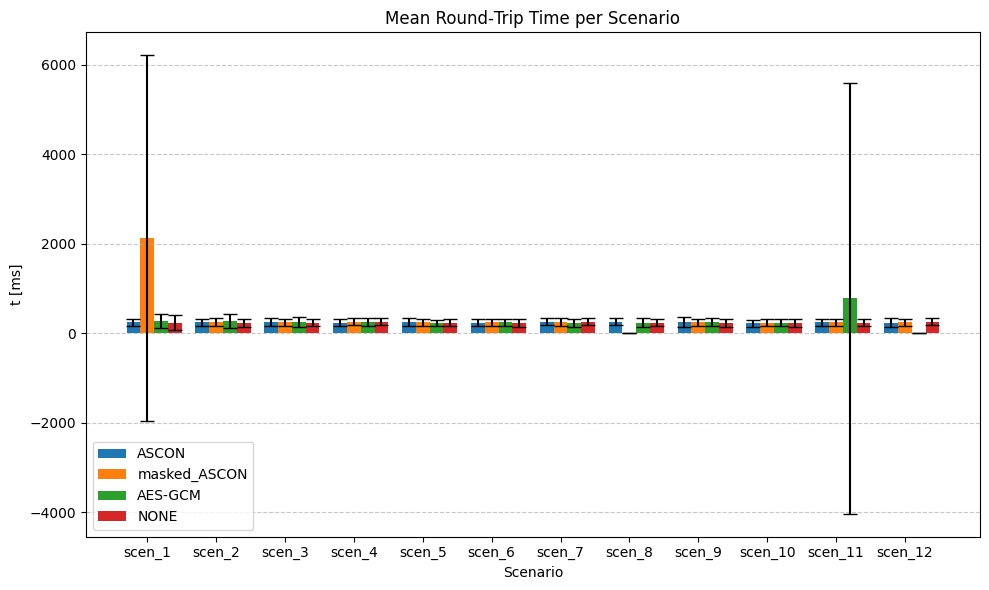

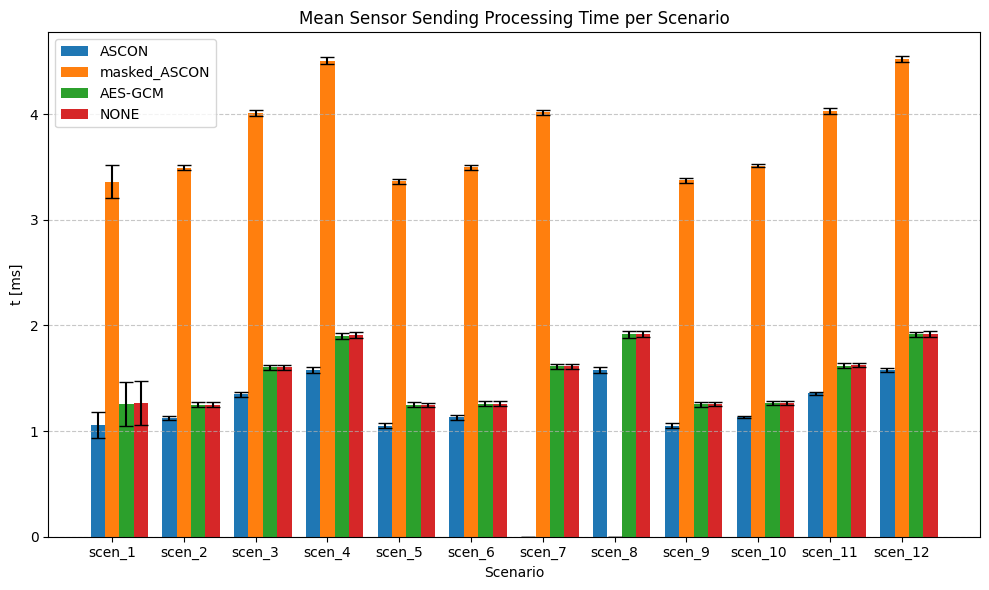

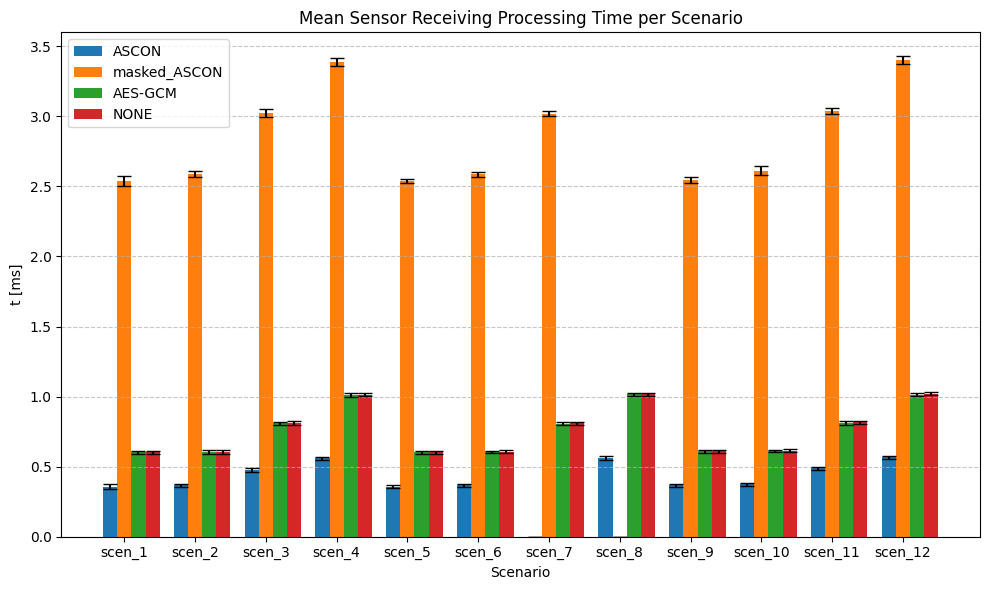

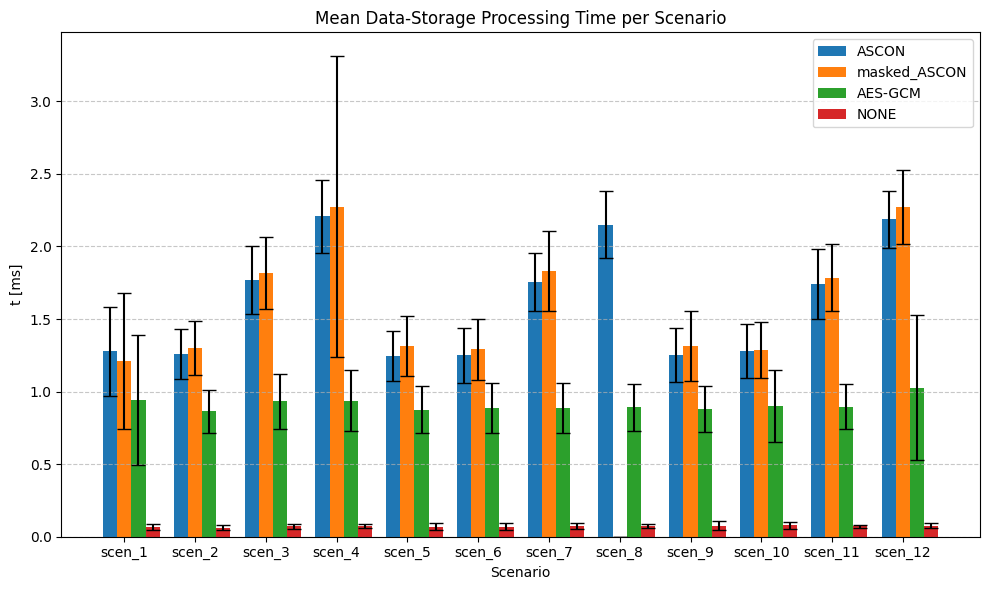

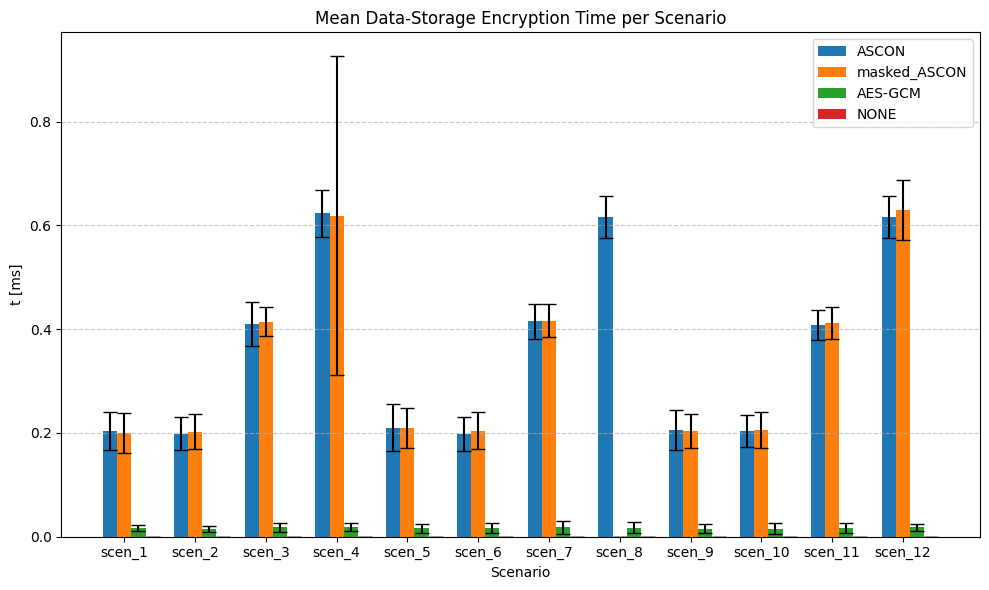

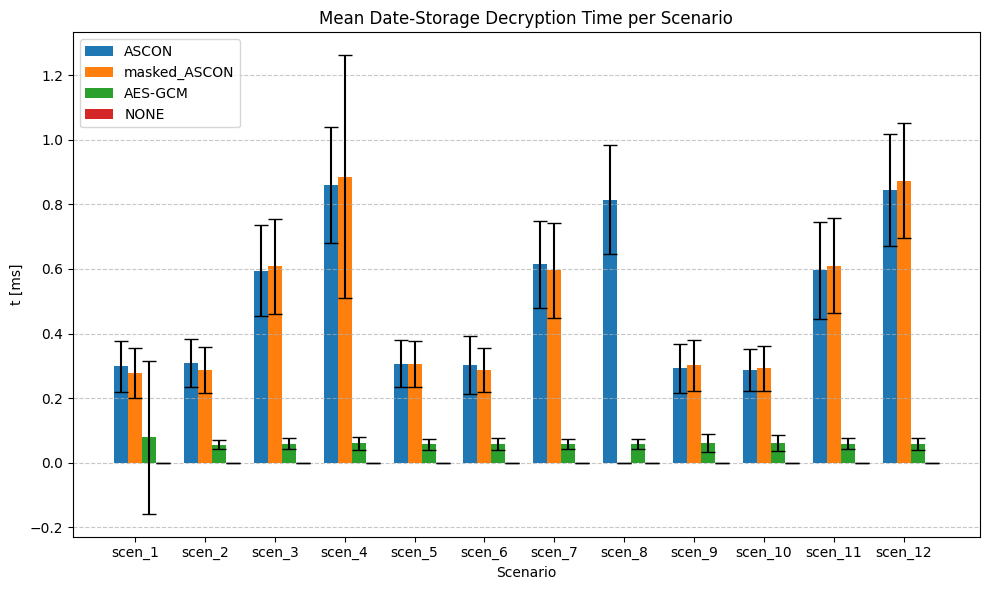

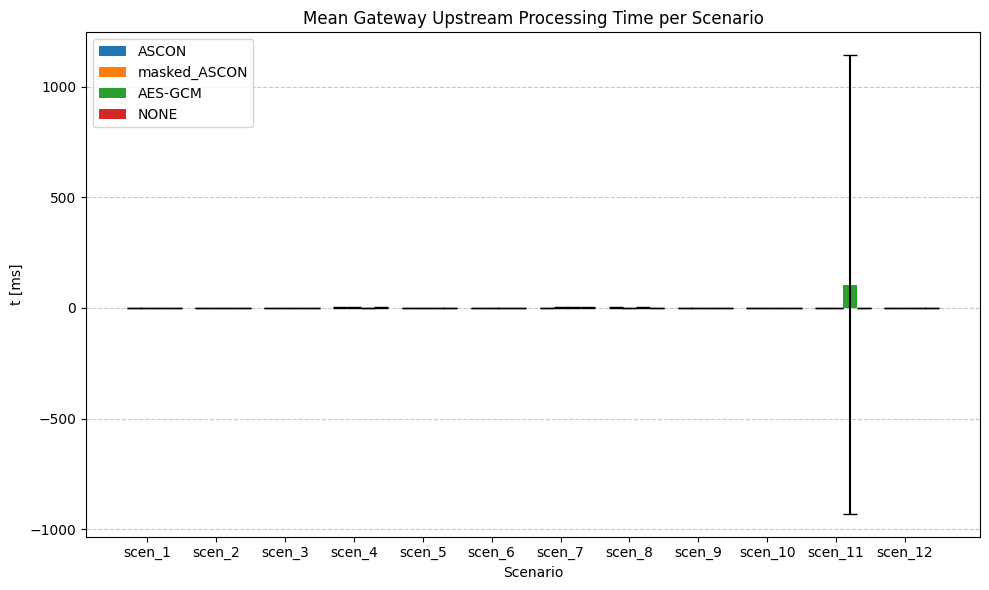

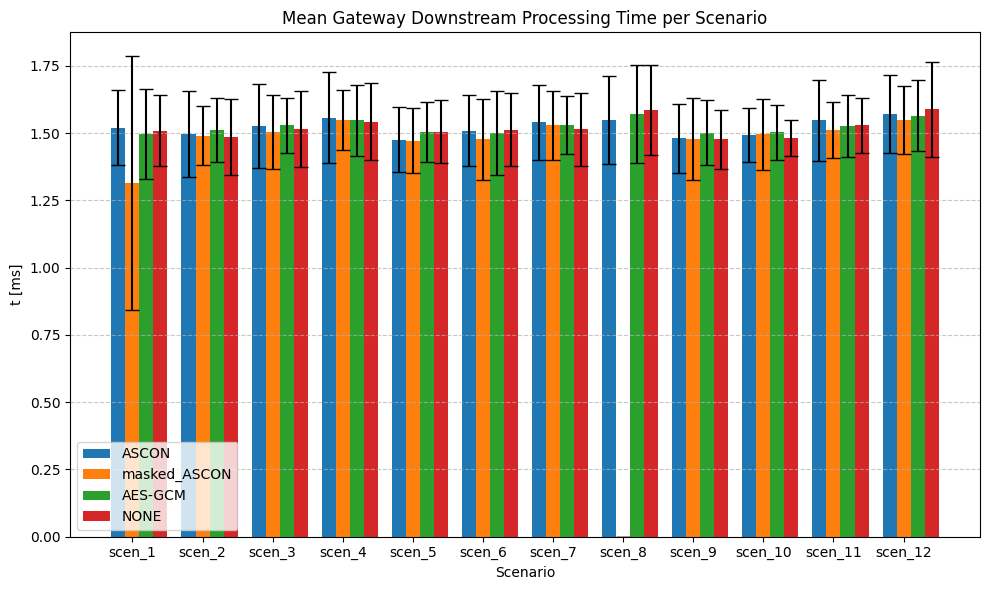

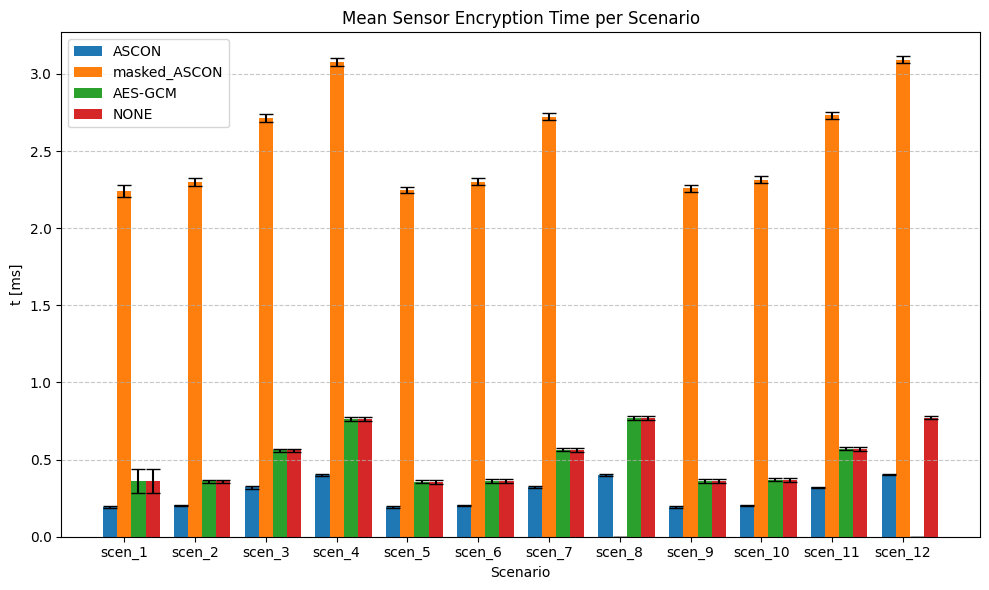

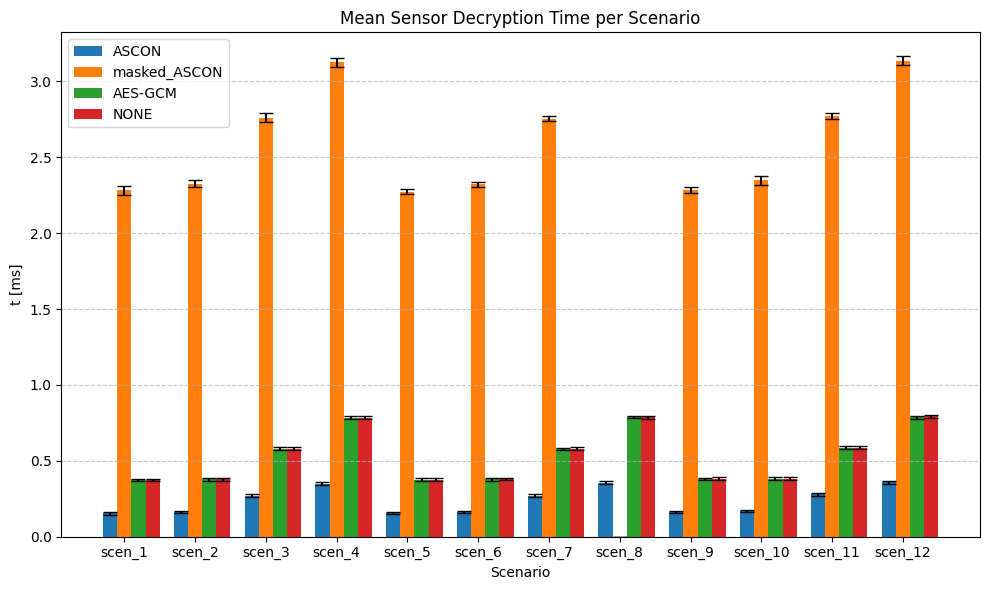

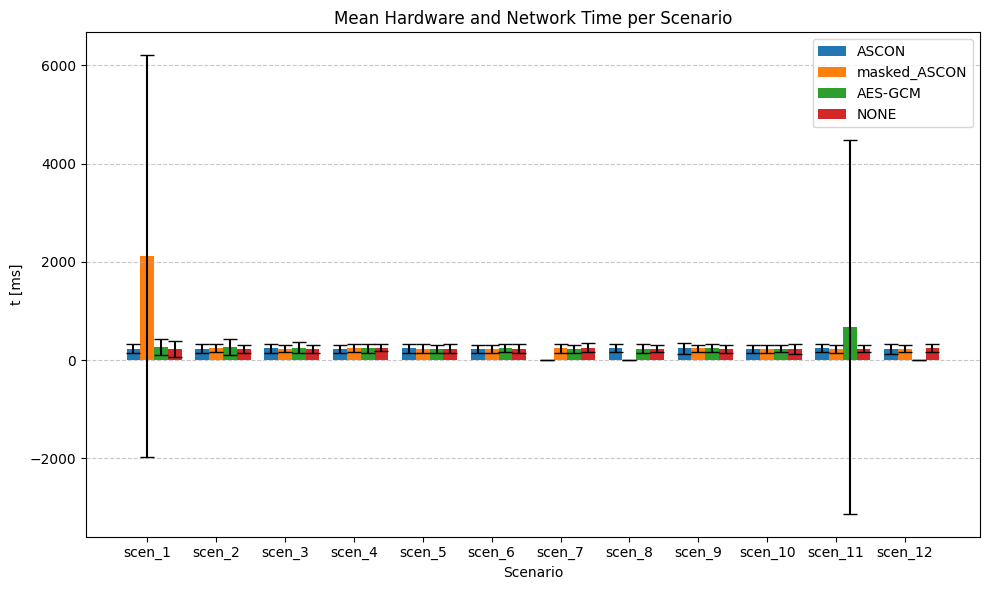

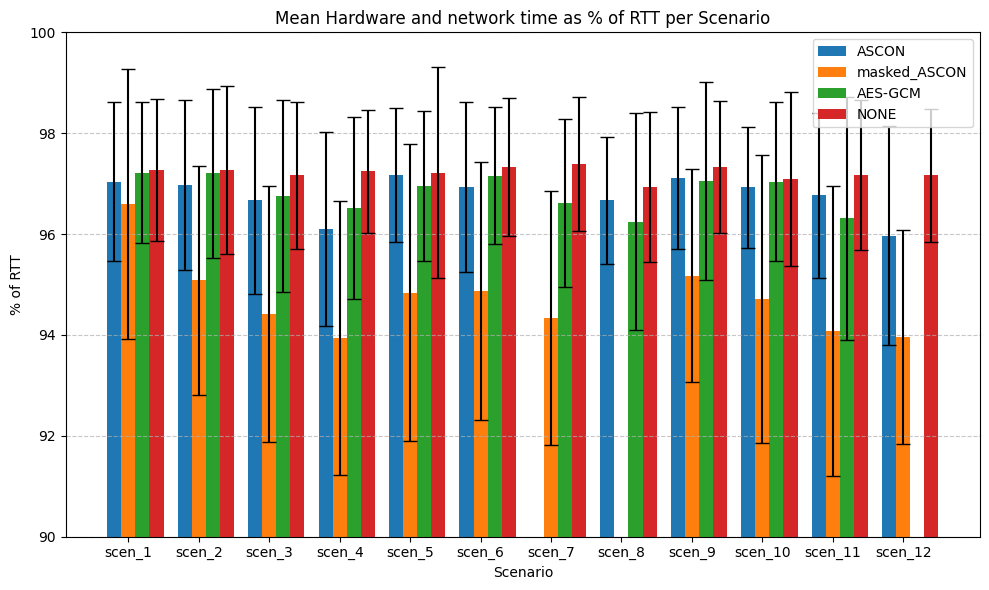

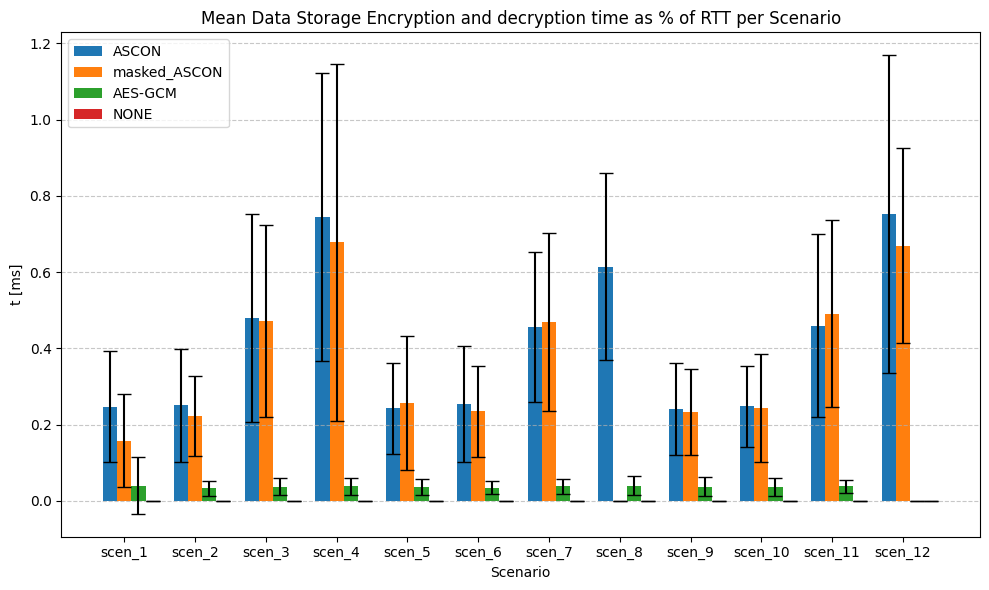

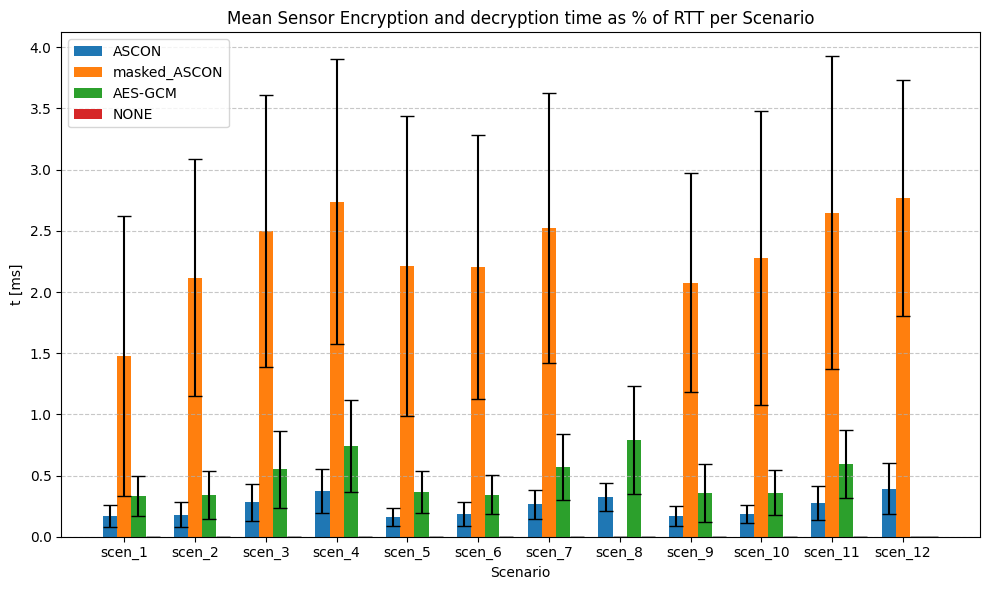

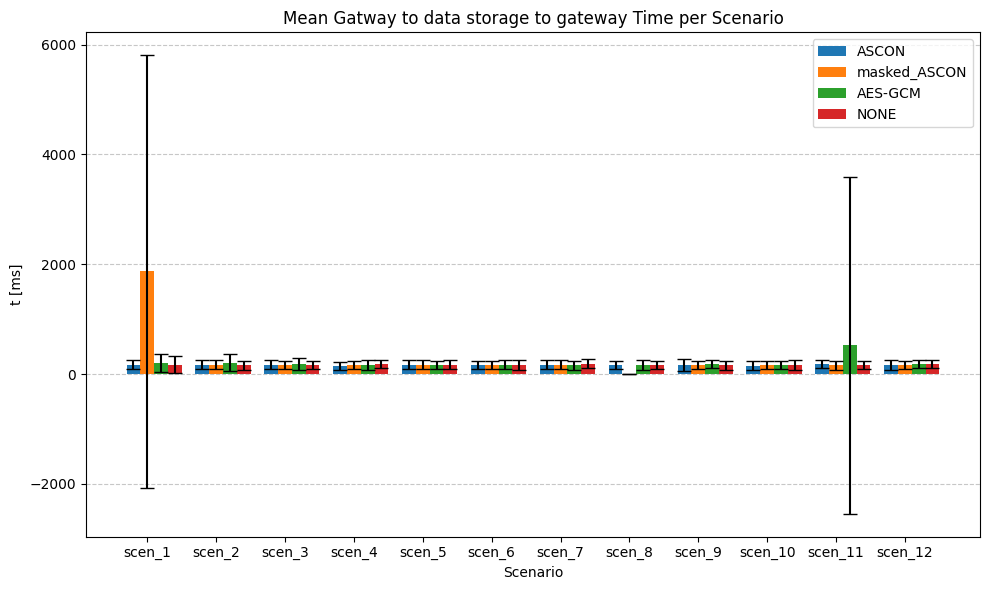

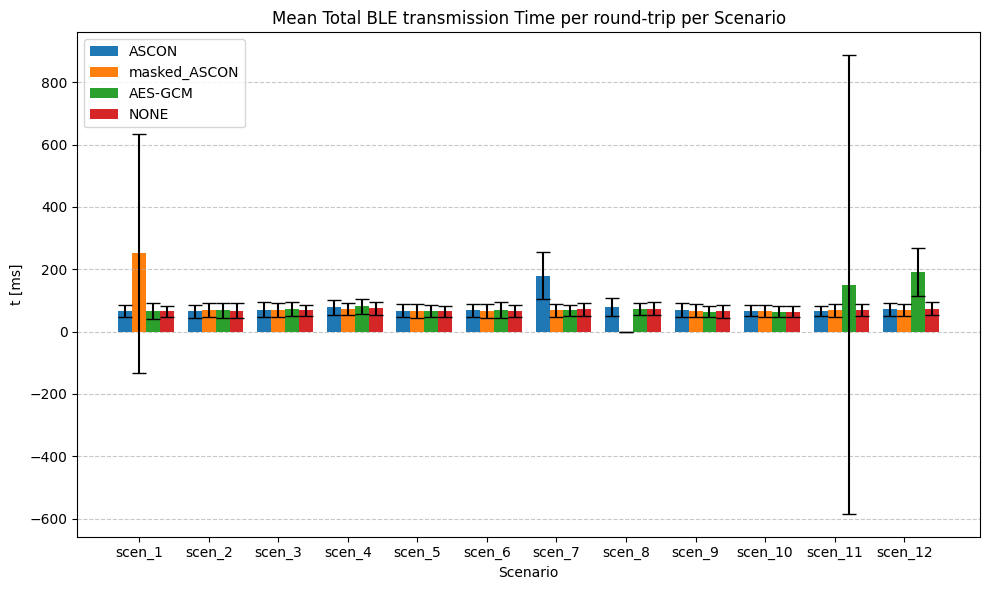

In [9]:
figure_path = os.path.join("..", "figures", "means_bar_plot")
h.save_figure(frames, figure_path)

In [10]:
h.get_stats(frames, 11, "DS_DEC")

,Method,Mean_DS_DEC,Std_DS_DEC
0,ASCON_DS_DEC,0.596098,0.150715
1,masked_ASCON_DS_DEC,0.609523,0.146792
2,AES-GCM_DS_DEC,0.059402,0.016016
3,NONE_DS_DEC,0.000000,0.000000
